In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#reading data from csv file and expressing as dataframe
housing = pd.read_csv("1ropani.csv")
housing = pd.DataFrame(housing)

In [3]:
#dropping null values as room has NAN values
housing.drop('room',inplace=True, axis=1)
housing.drop('title',inplace=True, axis=1)
housing.drop('link',inplace=True,axis=1)

In [4]:
#printing only head i.e. few rows
housing.head()

,price,area,location,district,floor,bedroom,bathroom,livingroom,kitchen,parking
0,"2,90,00,000",3 anna 3 paisa,Kathmandu,Kathmandu,Two And Half Floors,9 Bed Room,4 Bath Room,1 Living Room,1 Kitchen,1
1,"95,00,000",3 anna 1 daam,"Kathmandu, Tarkeshwor",Kathmandu,Two And Half Floors,7 Bed Room,3 Bath Room,1 Living Room,2 Kitchen,0
2,"3,85,00,000",4 anna,"Kathmandu, Dakshinamurti Marg,jayabahageshwori...",Kathmandu,3.5 Floors,5 Bed Room,4 Bath Room,1 Living Room,1 Kitchen,1
3,"1,30,00,000",11 dhur,"Chitwan, Bharatpur, bikash chowk",Chitwan,1 and Half Floors,3 Bed Room,3 Bath Room,1 Living Room,1 Kitchen,1
4,"3,00,00,000",4 anna,"Kathmandu, Budhanilkantha, Baluwakhani100 mete...",Kathmandu,Three Floors,5 Bed Room,4 Bath Room,3 Living Room,2 Kitchen,1


In [5]:
#function to clean string
def clean(string):
    string= string.replace('\n','')
    string= string.replace('\xa0\xa0','')
    string= string.replace(' ','')
    string= string.replace(',','')
    return (string)

In [6]:
#converting string price values to numeric
price= []
for i in housing['price']:
    i = clean(i)
    price.append(int(i))
housing['price'] = price
                 

In [7]:
#function to remove strings from columns
def removing_string(string):
    column = []
    for i in housing[string]:
        i = i.split(" ")[0]
        column.append(i)
    return(column)    

In [8]:
#making columns only have numeric values
housing['bedroom']= removing_string('bedroom')
housing['bathroom']= removing_string('bathroom')
housing['livingroom']= removing_string('livingroom')
housing['kitchen']= removing_string('kitchen')

In [9]:
#visualizing the dataset again
housing

,price,area,location,district,floor,bedroom,bathroom,livingroom,kitchen,parking
0,29000000,3 anna 3 paisa,Kathmandu,Kathmandu,Two And Half Floors,9,4,1,1,1
1,9500000,3 anna 1 daam,"Kathmandu, Tarkeshwor",Kathmandu,Two And Half Floors,7,3,1,2,0
2,38500000,4 anna,"Kathmandu, Dakshinamurti Marg,jayabahageshwori...",Kathmandu,3.5 Floors,5,4,1,1,1
3,13000000,11 dhur,"Chitwan, Bharatpur, bikash chowk",Chitwan,1 and Half Floors,3,3,1,1,1
4,30000000,4 anna,"Kathmandu, Budhanilkantha, Baluwakhani100 mete...",Kathmandu,Three Floors,5,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...
432,40000000,9 anna,Kathmandu500 m from Soaltee main Gate,Kathmandu500 m from Soaltee main Gate,4 Floors,5,3,1,1,1
433,25000000,4 anna 1 paisa,"Kathmandu, New Colony500 m from Sukedhara Chowk",Kathmandu,4 Floors,6,5,3,2,1
434,23000000,5 anna,"Lalitpur, Karyabinayak, Sainbu",Lalitpur,3 Floors,5,5,1,2,0
435,33000000,4 anna 1 paisa,"Lalitpur, Sainbu Bhainsepati, Mahila Samuha Ma...",Lalitpur,3 Floors,4,5,1,1,1


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

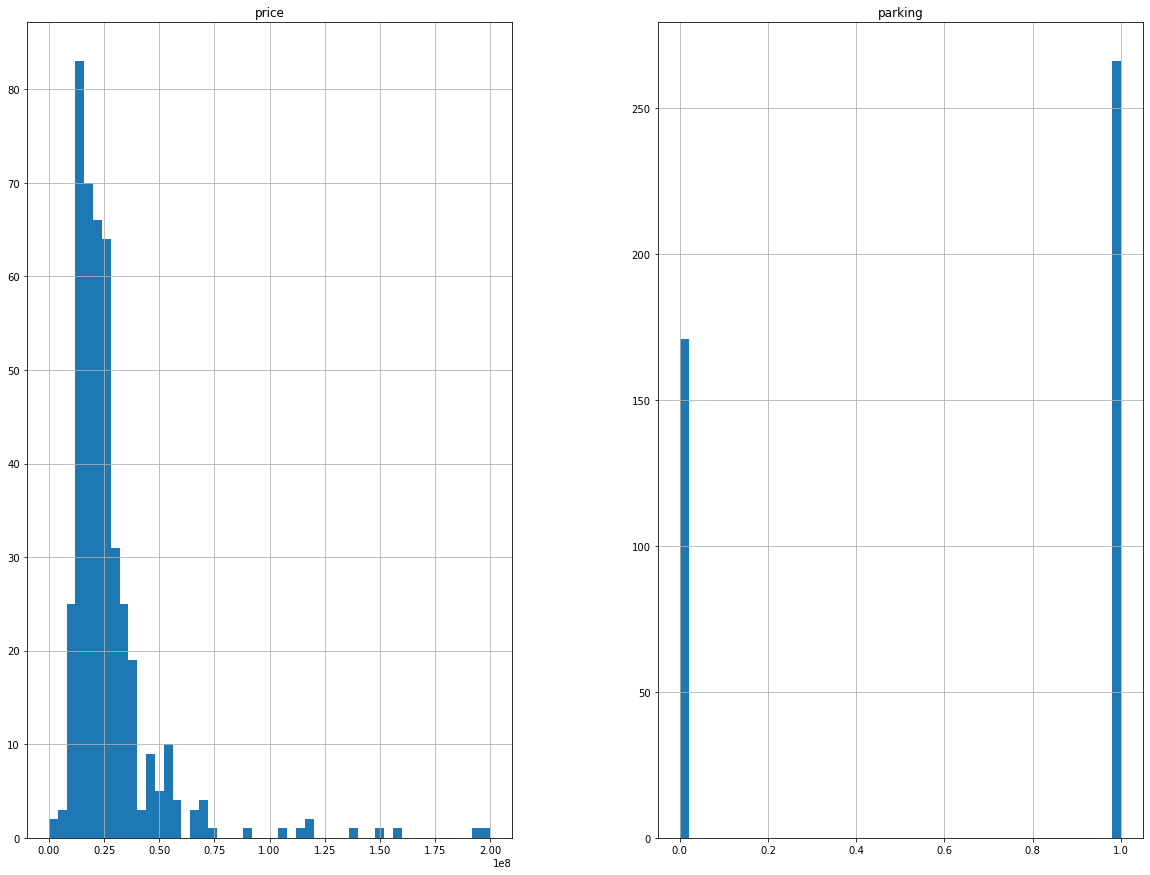

In [10]:
#visualizing data in histogram
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [11]:
#splitting columns to not_encode and enocde
X_not_encode= housing[['bedroom','bathroom','livingroom','kitchen','parking']]
X_label_encode = housing[['area','location','district','floor']]

In [12]:
#label encoding
from sklearn.preprocessing import LabelEncoder
X_label_encode = X_label_encode.apply(LabelEncoder().fit_transform)

In [13]:
X = pd.concat([X_label_encode, X_not_encode], axis=1, join="inner")
X

,area,location,district,floor,bedroom,bathroom,livingroom,kitchen,parking
0,42,16,4,22,9,4,1,1,1
1,33,174,4,22,7,3,1,2,0
2,45,95,4,7,5,4,1,1,1
3,15,11,2,1,3,3,1,1,1
4,45,42,4,18,5,4,3,2,1
...,...,...,...,...,...,...,...,...,...
432,82,215,11,8,5,3,1,1,1
433,47,157,4,8,6,5,3,2,1
434,57,267,28,6,5,5,1,2,0
435,47,341,28,6,4,5,1,1,1


In [14]:
y = housing[['price']]

In [15]:
y.head()

,price
0,29000000
1,9500000
2,38500000
3,13000000
4,30000000


In [16]:
#splitting the data into train and test dataset
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33,random_state=42)

In [17]:
#importing linearregression model from sklearn and fitting it in train dataset
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain,ytrain)

LinearRegression()

In [18]:
#printing the coefficients
lm.coef_

array([[ -209778.82988919,   -28221.73791273,    70629.77819999,
           34960.53525768,   274596.74472122,  5568826.16034625,
         2567475.12411157, -5882962.84417214,  2673399.56961128]])

In [19]:
X.columns

Index(['area', 'location', 'district', 'floor', 'bedroom', 'bathroom',
       'livingroom', 'kitchen', 'parking'],
      dtype='object')

In [20]:
col = np.array(X.columns)

In [21]:
coef_df = pd.DataFrame(lm.coef_.reshape(-1,1), col, columns=['Coefficient'])
coef_df

,Coefficient
area,-2.097788e+05
location,-2.822174e+04
district,7.062978e+04
floor,3.496054e+04
bedroom,2.745967e+05
bathroom,5.568826e+06
livingroom,2.567475e+06
kitchen,-5.882963e+06
parking,2.673400e+06


In [22]:
#making predictions
predictions = lm.predict(Xtest)

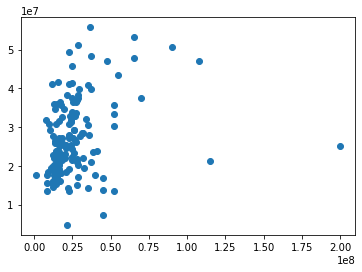

In [23]:
plt.scatter(ytest,predictions)

In [24]:
ytest.shape

(145, 1)

In [25]:
predictions.shape

(145, 1)

In [26]:
lm.score(Xtest,ytest)

0.0333174459653659